In [15]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [16]:
import numpy as np
import pandas as pd

In [17]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [22]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

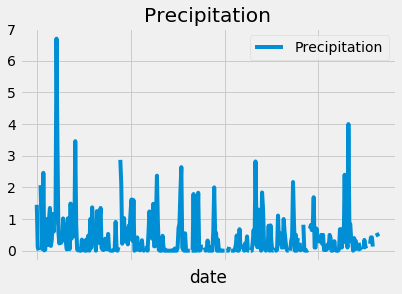

In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#sounds good, let's do it!
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
rain = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date > last_year).\
       group_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rain)
rain_bydate_df = rain_df.set_index("date")
rain_bydate_df
# # Sort the dataframe by date

# # Use Pandas Plotting with Matplotlib to plot the data
rain_bydate_df.plot(label="Precipitation")
plt.title("Precipitation")
plt.legend(["Precipitation"])
plt.show()

In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [41]:
stats = rain_bydate_df.describe()
stats

,prcp
count,345.000000
mean,0.432087
std,0.704363
min,0.000000
25%,0.010000
50%,0.140000
75%,0.580000
max,6.700000


In [42]:
total_stations = session.query(Station.station).count()
total_stations

9

In [12]:
# Design a query to show how many stations are available in this dataset?


[(9)]

In [50]:
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()

most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [61]:
top_most_active = most_active[0][0]
top_most_active

'USC00519281'

In [70]:
max_temp = session.query(func.max(Measurement.tobs)).\
                filter(Measurement.station == top_most_active).\
                order_by(func.count(Measurement.station).desc()).all()

low_temp = session.query(func.min(Measurement.tobs)).\
                filter(Measurement.station == top_most_active).\
                order_by(func.count(Measurement.station).desc()).all()

avg_temp = session.query(func.avg(Measurement.tobs)).\
                filter(Measurement.station == top_most_active).\
                order_by(func.count(Measurement.station).desc()).all()

print(low_temp, max_temp, avg_temp)

[(54.0,)] [(85.0,)] [(71.66378066378067,)]


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

In [74]:
tobs = session.query(Measurement.tobs).filter(Measurement.date >= last_year,\
       Measurement.station == top_most_active).all()
tobs_df= pd.DataFrame(tobs)
tobs_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


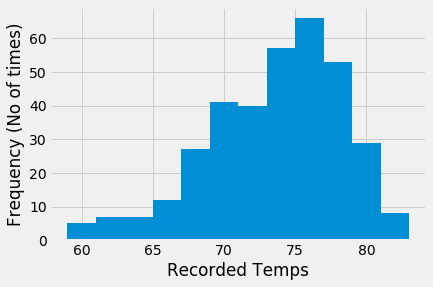

In [78]:
plt.hist(tobs_df['tobs'], bins=12)
plt.xlabel("Recorded Temps")
plt.ylabel("Frequency (No of times)")
plt.show()


In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [79]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [80]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_arrive = dt.date(2017, 4, 13)
trip_leave = dt.date(2017, 4, 27)
last_year = dt.timedelta(days=365)
temp_avg_last_year = (calc_temps((trip_arrive-last_year), (trip_leave-last_year)))
print(temp_avg_last_year)

[(66.0, 74.11578947368422, 80.0)]


In [86]:
trip_dates = session.query(Measurement.date, Measurement.tobs).filter(\
        Measurement.date >= trip_arrive,\
         Measurement.date <= trip_leave).all()

trip_dates_df = pd.DataFrame(trip_dates)

max_temp = trip_dates_df["tobs"].max()
min_temp = trip_dates_df["tobs"].min()
avg_temp = trip_dates_df["tobs"].mean()

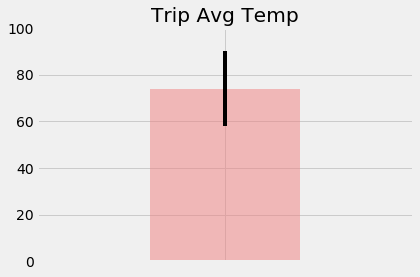

In [95]:
plt.bar(1, avg_temp, yerr= max_temp - min_temp, tick_label="", alpha=0.5, color="lightcoral")
plt.title("Trip Avg Temp")
plt.xlim(0,2)
plt.ylim(0,100)
plt.show()

<IPython.core.display.Javascript object>


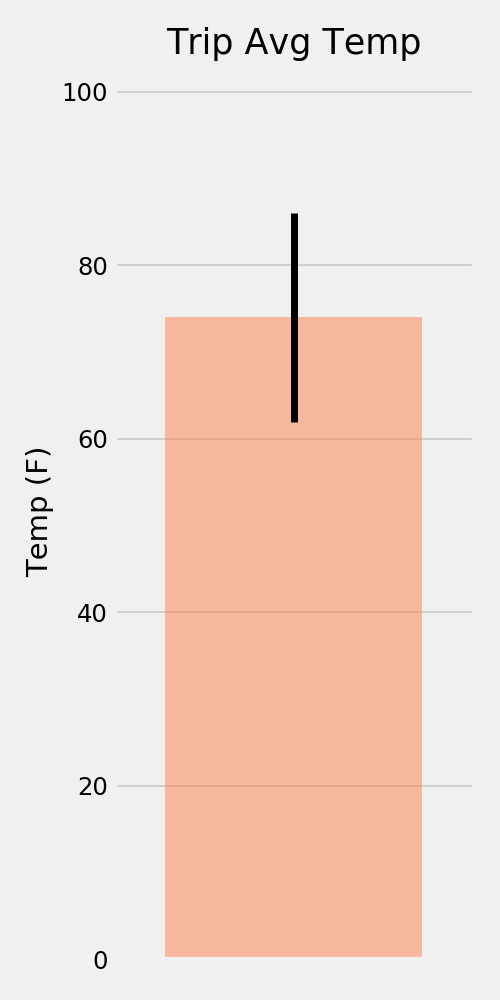

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
